# Тестовые задания. Каримов Ильдар

## Задание №2 (Pandas, Numpy):

**Дано:** динамические данные по дебиту газа.

**Формат исходных данных:** 
- Date&Time – дата и время замера, 
- qg_sc – объемный дебит газа в м3\сут.

**Задача:**
Написать скрипт (на Python) для обнаружения выбросов в динамических данных по
дебиту газа. Данный скрипт должен читать исходные данные, добавлять столбец «Outlier» со
значениями 1 – выброс, 0 – не выброс, и записывать результат в файл Excel.
На основе написанного скрипта необходимо получить результат для 4 предоставленных
примеров.

**Замечания:** необходимо учесть, что данные динамические, то есть в них есть тренды.

**Идея:**
1. Проанализировать отклонения значения в точке от тренда в скользящем окне.
2. Часто при поиске выбросов пользуются правилом трех сигм.

### Решение: 

In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# прочитаем файл и сохраним результат в датафрейме df
df = pd.read_excel('C:/Users/Ильдар/Desktop/Тестовые задания/Задание № 2 (данные).xlsx', sheet_name='№1')

In [3]:
df # выведем таблицу

,Date&Time,qg_sc
0,2020-01-12 12:59:06.000,224.80
1,2020-01-12 13:59:06.000,244.13
2,2020-01-12 14:59:06.000,243.21
3,2020-01-12 15:59:06.000,243.90
4,2020-01-12 16:59:06.000,244.28
...,...,...
1566,2020-03-17 18:59:13.825,332.19
1567,2020-03-17 19:59:13.830,332.49
1568,2020-03-17 20:59:13.835,331.95
1569,2020-03-17 21:59:13.840,331.91


In [4]:
df.info() # выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date&Time  1571 non-null   datetime64[ns]
 1   qg_sc      1571 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.7 KB


In [5]:
df['Date&Time'].min() # найдем самую раннее время в таблице

Timestamp('2020-01-12 12:59:06')

In [6]:
df['Date&Time'].max() # найдем самую позднее время в таблице

Timestamp('2020-03-17 22:59:13.845000')

In [7]:
df['date'] = df['Date&Time'].dt.date # преобразуем временной тип 

In [8]:
# берем среднее арифметическое и среднее квадратическое отклонение за дату 

df_grouped = df.groupby('date').agg({'qg_sc': ['mean', 'std']}) 

In [9]:
df_grouped.head() # выведем первые 5 строк таблицы на экран 

qg_sc           
                  mean        std
date                             
2020-01-12  243.263333   5.914029
2020-01-13  300.731667  51.022648
2020-01-14  340.086250   0.595299
2020-01-15  339.680833   0.546323
2020-01-16  335.178333  21.654976

In [10]:
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns.values] # уберем "этажность" названий столбцов 

In [11]:
df_grouped = df_grouped.reset_index() # уберем индекс 

In [12]:
df = df.merge(df_grouped) # объеденим таблицы 

Воспользуемся правилом "трех сигм" при поиске выбросов.

In [13]:
# добавим новый столбец Outlier со значениями 1 – выброс, 0 – не выброс
df['Outlier'] = (
                ~(df.qg_sc > (df.qg_sc_mean - 3 * df.qg_sc_std)) & (df.qg_sc < (df.qg_sc_mean + 3 * df.qg_sc_std))).astype(
        int)

In [14]:
df[['Date&Time', 'qg_sc', 'Outlier']].head() # выведем первые 5 строк итоговой таблицы на экран 

,Date&Time,qg_sc,Outlier
0,2020-01-12 12:59:06,224.80,1
1,2020-01-12 13:59:06,244.13,0
2,2020-01-12 14:59:06,243.21,0
3,2020-01-12 15:59:06,243.90,0
4,2020-01-12 16:59:06,244.28,0


In [15]:
df[df['Outlier'] == 1] # выведем стороки с выбросами 

,Date&Time,qg_sc,date,qg_sc_mean,qg_sc_std,Outlier
0,2020-01-12 12:59:06.000,224.80,2020-01-12,243.263333,5.914029,1
96,2020-01-16 12:59:06.475,233.56,2020-01-16,335.178333,21.654976,1
166,2020-01-19 10:59:06.825,336.80,2020-01-19,339.171250,0.704972,1
199,2020-01-20 19:59:06.990,332.37,2020-01-20,338.461250,1.457685,1
245,2020-01-22 17:59:07.220,335.41,2020-01-22,338.238750,0.841847,1
348,2020-01-27 00:59:07.735,340.02,2020-01-27,378.205000,11.807319,1
349,2020-01-27 01:59:07.740,339.86,2020-01-27,378.205000,11.807319,1
418,2020-01-29 22:59:08.085,369.69,2020-01-29,381.706250,3.781228,1
419,2020-01-29 23:59:08.090,369.73,2020-01-29,381.706250,3.781228,1
469,2020-02-01 01:59:08.340,226.93,2020-02-01,309.515417,23.486888,1


### Построим графики и обозначим цветом найденные выбросы.

In [16]:
# подготовим данные к визуализации

df['dot_c'] = ''
df.loc[df.Outlier == 0, 'dot_c'] = 'blue'
df.loc[df.Outlier == 1, 'dot_c'] = 'red'

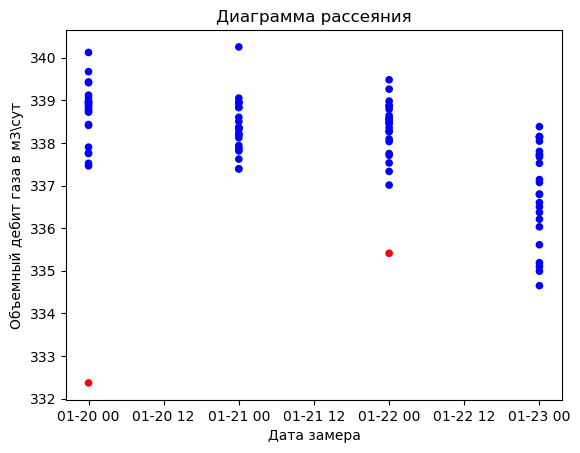

In [17]:
def plot_outliers(min_date, max_date):
    df[(pd.to_datetime(df['date']).dt.date>=datetime.date(datetime.strptime(min_date,'%Y-%m-%d')))
      &(pd.to_datetime(df['date']).dt.date<=datetime.date(datetime.strptime(max_date,'%Y-%m-%d')))]\
        .plot.scatter(x='date',y='qg_sc',c='dot_c', title='Диаграмма рассеяния',\
                      xlabel='Дата замера', ylabel='Объемный дебит газа в м3\сут')      

plot_outliers('2020-01-20','2020-01-23')

### Скрипт: 

In [ ]:
import pandas as pd
import argparse

def main(path):
    print(path)
    df = pd.read_excel(path)
    df['date'] = df['Date&Time'].dt.date
    df_grouped = df.groupby('date').agg({'qg_sc': ['mean', 'std']})
    df_grouped.columns = ['_'.join(col) for col in df_grouped.columns.values]
    df_grouped = df_grouped.reset_index()
    df = df.merge(df_grouped)
    df['Outlier'] = (
                ~(df.qg_sc > (df.qg_sc_mean - 3 * df.qg_sc_std)) & (df.qg_sc < (df.qg_sc_mean + 3 * df.qg_sc_std))).astype(
        int)
    df[['Date&Time', 'qg_sc', 'Outlier']].to_excel(path, index=False)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Outliers detector')
    parser.add_argument('filename')

    args = parser.parse_args()
    main(args.filename)

Команда для запуска в терминале - **python скрипт.py данные.xlsx**